In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from seaborn import boxplot
from seaborn import swarmplot
from seaborn import scatterplot

In this notebook the .csv file corresponding to the relevant plotting information will be used. Prior to plotting, the ranges of values between which the variables of the dataset fall will be observed.

In [26]:
plotting_data = pd.read_csv('plotting_data', index_col = [0])

### Researching into data values

In [27]:
plotting_data.astype(int).describe()

,year,round,division,local_goals,visitor_goals,points_local,wins_local,draws_local,losses_local,gf_local,...,pos_local,points_visitor,wins_visitor,draws_visitor,losses_visitor,gf_visitor,ga_visitor,avg_visitor,pos_visitor,match_winner
count,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,...,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000
mean,2018.500000,20.000000,1.523810,1.394895,1.029816,25.480266,6.642643,5.613900,6.743458,22.883955,...,11.193908,25.785500,6.744316,5.612184,6.643501,23.108752,22.903904,0.204848,10.853711,0.812312
std,1.708008,10.678224,0.499486,1.188878,1.041805,16.878922,4.891017,3.757993,4.815301,15.385598,...,6.099770,16.941128,4.914267,3.774109,4.788052,15.510797,14.853435,12.348645,6.089588,0.822706
min,2016.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.000000,1.000000,0.000000
25%,2017.000000,11.000000,1.000000,1.000000,0.000000,12.000000,3.000000,3.000000,3.000000,11.000000,...,6.000000,12.000000,3.000000,3.000000,3.000000,11.000000,11.000000,-6.000000,6.000000,0.000000
50%,2018.500000,20.000000,2.000000,1.000000,1.000000,23.000000,6.000000,5.000000,6.000000,21.000000,...,11.000000,24.000000,6.000000,5.000000,6.000000,22.000000,22.000000,0.000000,11.000000,1.000000
75%,2020.000000,29.000000,2.000000,2.000000,2.000000,37.000000,9.000000,8.000000,10.000000,33.000000,...,16.000000,37.000000,10.000000,8.000000,10.000000,33.000000,33.000000,5.000000,16.000000,2.000000
max,2021.000000,38.000000,2.000000,10.000000,8.000000,90.000000,27.000000,19.000000,27.000000,112.000000,...,22.000000,90.000000,28.000000,20.000000,26.000000,109.000000,89.000000,80.000000,22.000000,2.000000


With this description you can comment on some extra information. In the variables local goals and visitor goals, referring to the goals in a match, it is observed that the average value is 1.39 goals for the home team and 1.02 for the visiting team. This already indicates a tendency for the home team to win, but also an average of one goal per game for the away team is interesting to take into account.

Regarding the output variable, match winner, the mean value of 0.81, reaffirms what was said in the previous paragraph, there is a deviation towards the home team winning against the away team. The mean, in case of equality of results should be 1, so if it is below, the tendency is towards the result of 0 (home win).

We start plotting with matplotlib, however for a better and more elegant visualisation we will switch to the seaborns library.

### Correlation heatmap

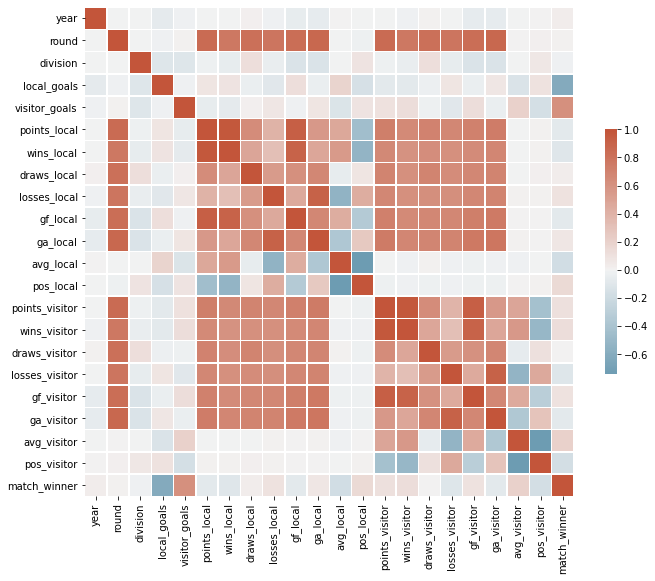

In [28]:
corr = plotting_data.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

After visualising the correlation map, it can be seen that there is no strong correlation between the target variable and the inputs except for Local goals (high positive correlation) and visitor goals (high negative correlation). However, these are not relevant as they contain information related to the outcome of the match to be predicted, so they cannot be included in the models. 

On the other hand, a fairly high correlation can be observed between the input variables. This can lead to a redundancy of information for the model. 

However, there are also interesting inputs that are less correlated with the rest of the inputs, such as those related to the position (pos_local) and the average (avg_local) of both the home team and the away team.

### Match winner histogram 

In the following we observe the distribution of results in the three categories of the target variable.

#### Matplotlib

[]

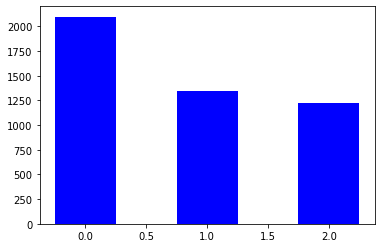

In [29]:
d = np.diff(np.unique(cleaned_data['match_winner'])).min()
left_of_first_bin = cleaned_data['match_winner'].min() - float(d)/2
right_of_last_bin = cleaned_data['match_winner'].max() + float(d)/2
plt.hist(cleaned_data['match_winner'], np.arange(left_of_first_bin, right_of_last_bin + d, d),color= 'blue', label = True, rwidth = 0.5, histtype =  'barstacked' )
plt.plot()

#### Seaborn

In [30]:
sns.color_palette(palette='pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

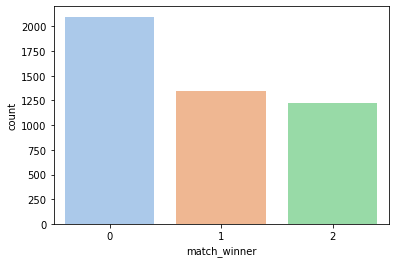

In [31]:
sns.countplot(data = plotting_data, x="match_winner", palette='pastel')

As can be seen in both histograms(the content is the same), the most abundant category is Local win (0). There is not a big difference between the number of draws (1) and visitor wins (2), with the number of draws being slightly higher. Therefore, from this graph alone, it can already be seen that there is a tendency for the home team to win. 

In the following we will see how these results behave according to different input variables of interest. 


### Boxplots

Next, using a boxplot, it is shown how these variables, which are less correlated with the rest of the inputs, affect the match winner output variable. 


#### Position  

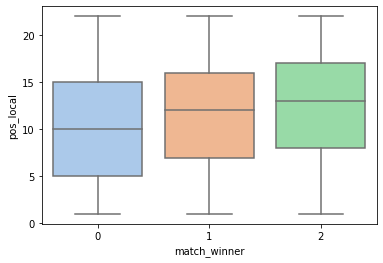

In [32]:
sns.boxplot(x="match_winner", y="pos_local", data=plotting_data, orient ='v', palette='pastel')

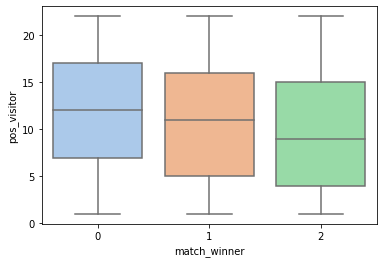

In [33]:
sns.boxplot(x="match_winner", y="pos_visitor", data=plotting_data, orient ='v', palette='pastel')

It can be seen from the boxplots that there is a relationship between the winner of a match depending on the position of each team in the league table. Against the home position there is a clear tendency for the home team to win (0) as the position of the home team is higher. However, when analysing away position, the higher the position of the away team, the more the tendency shifts towards an away win (2).

### Scatterplot

#### Average

To show the content of the average columns and to see their influence on the result of the match, scatterplots are used. In these, the average of the home and away team is set against each other and coloured according to the result of each match.

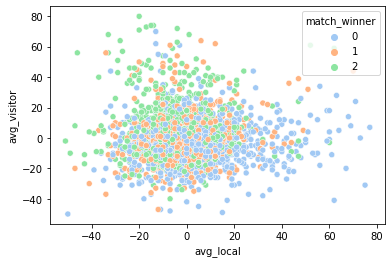

In [34]:
sns.scatterplot(data=plotting_data, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')

It is observed that in addition to a large concentration of matches around an avg in an interval of (-20, +20) for both home and away, there is a certain dispersion of points for matches that pit a team with a very high avg against a very low avg. For these scattered points, the wins correspond to the team with a much higher avg. That is, for very high avg of the home team versus low avg of the away team, a majority of points correspond to a home win. Conversely, the same happens when the high avg corresponds to the visiting team and it faces a home team with a low avg, which means a very high percentage of wins for the visiting team. 

It can be concluded from this that a large avg difference between two teams is decisive for the victory of the team with the higher average, regardless of whether they play at home or away. Although it should be mentioned that when this happens at home, the reliability is even higher, with a few defeats (small percentage) of the team with high avg when playing away.

## Filtering data for plotting

In the previous plots there was a high concentration of points corresponding to all the matches contained in the dataset. We are going to plot again filtering this data (division, year, round) and limiting the number of points for each graph in order to obtain a clearer visualisation. 

### Plotting by rounds

In [37]:
plotting_data_round10 = plotting_data.loc[plotting_data['round'] <= 10]
plotting_data_round10_20 = plotting_data.loc[(10 < plotting_data['round']) & (plotting_data['round']<= 20)]
plotting_data_round20_30 = plotting_data.loc[(20 < plotting_data['round']) & (plotting_data['round']<= 30)]
plotting_data_round30 = plotting_data.loc[plotting_data['round'] > 30]

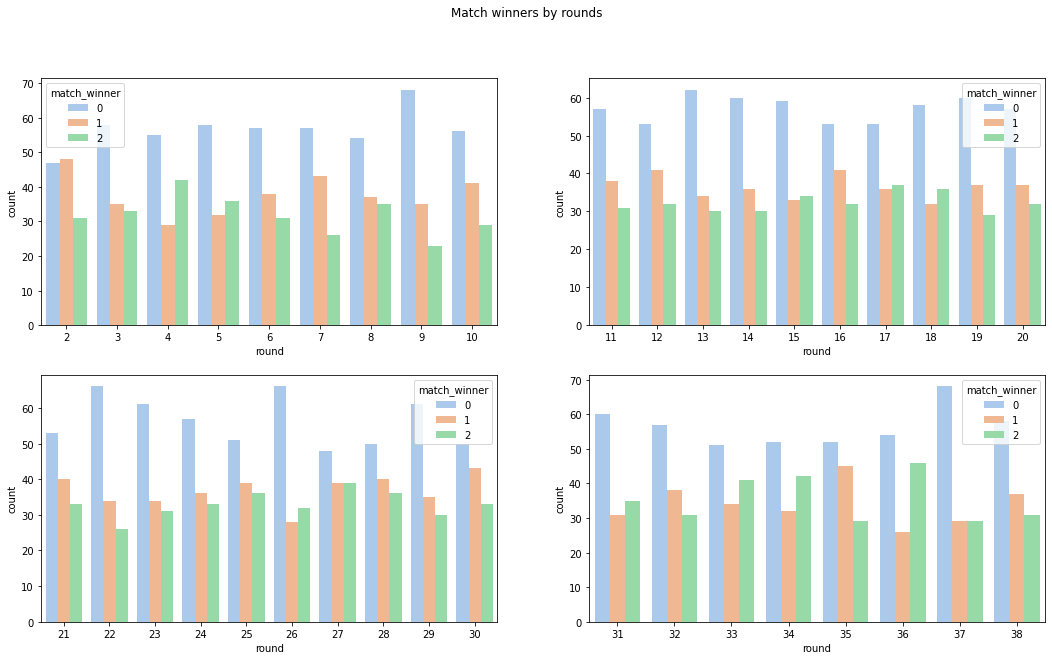

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Match winners by rounds')

sns.countplot(ax=axes[0, 0], data=plotting_data_round10, x="round", hue='match_winner', palette='pastel')
sns.countplot(ax=axes[0, 1], data=plotting_data_round10_20, x="round", hue='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 0], data=plotting_data_round20_30, x="round", hue='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 1], data=plotting_data_round30, x="round", hue='match_winner', palette='pastel')

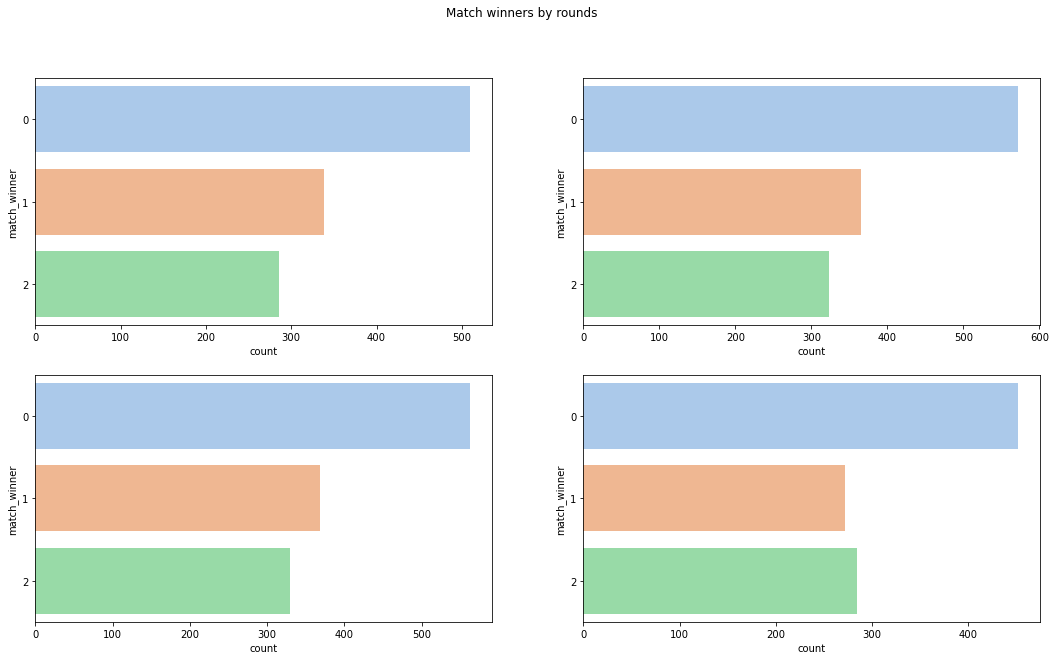

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Match winners by rounds')

sns.countplot(ax=axes[0, 0], data=plotting_data_round10, y='match_winner', palette='pastel')
sns.countplot(ax=axes[0, 1], data=plotting_data_round10_20, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 0], data=plotting_data_round20_30, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 1], data=plotting_data_round30, y='match_winner', palette='pastel')

After these two plots, we have been able to observe the distribution of victories per round. 

Firstly by looking at the results round by round, and in the second plot the accumulated results by packs of 10 rounds (1-10, 10-20, 20-30, 30-38).

In the first plot, a majority of home wins are maintained round by round, with a more variable ratio of draws and away wins. 

However, using the second plot, it can be seen that the proportions of home wins, away wins and draws are the same in the different phases of the season. 

It has to be taken into account that in the fourth plot the count is lower because it counts 8 rounds instead of 10.
It is interesting that in this last batch of matchdays there is a higher number of away wins than draws. This could mean that in these last games the teams take more risks and that is why the number of draws is reduced.

### Plotting by season & division 

The next filter to be imposed on the plot will be to separate the data by first and second division (Liga Santander & Liga Smartbank). 

Once filtered by divisions, it will be filtered by seasons, in order to observe if there is a different trend during the last 6 seasons. 

It is important to remember that the season is determined by the column 'year', which contains a year between 2016 and 2021 and at this point, it is important to explain that this year means the year in which the second half of the season takes place. In other words, the matches corresponding to the year 2021 are all those corresponding to season 2020-21. Similarly, the year 2016 refers to the matches of the 2015-2016 season.

In [40]:
plotting_div1 = plotting_data.loc[plotting_data['division'] == 1]
plotting_div2 = plotting_data.loc[plotting_data['division'] == 2]

In [41]:
plotting_div1_2016 = plotting_div1.loc[plotting_data['year'] == 2016]
plotting_div1_2017 = plotting_div1.loc[plotting_data['year'] == 2017]
plotting_div1_2018 = plotting_div1.loc[plotting_data['year'] == 2018]
plotting_div1_2019 = plotting_div1.loc[plotting_data['year'] == 2019]
plotting_div1_2020 = plotting_div1.loc[plotting_data['year'] == 2020]
plotting_div1_2021 = plotting_div1.loc[plotting_data['year'] == 2021]
plotting_div2_2016 = plotting_div2.loc[plotting_data['year'] == 2016]
plotting_div2_2017 = plotting_div2.loc[plotting_data['year'] == 2017]
plotting_div2_2018 = plotting_div2.loc[plotting_data['year'] == 2018]
plotting_div2_2019 = plotting_div2.loc[plotting_data['year'] == 2019]
plotting_div2_2020 = plotting_div2.loc[plotting_data['year'] == 2020]
plotting_div2_2021 = plotting_div2.loc[plotting_data['year'] == 2021]

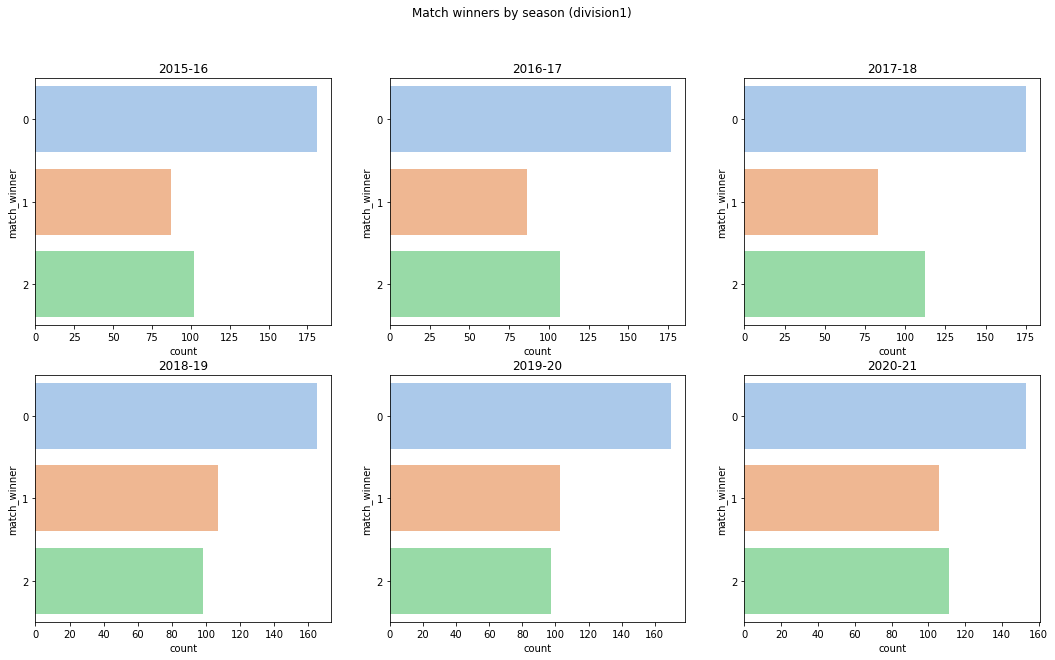

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Match winners by season (division1)')

axes[0,0].set_title('2015-16')
axes[0,1].set_title('2016-17')
axes[0,2].set_title('2017-18')
axes[1,0].set_title('2018-19')
axes[1,1].set_title('2019-20')
axes[1,2].set_title('2020-21')

sns.countplot(ax=axes[0, 0], data=plotting_div1_2016, y='match_winner', palette='pastel')
sns.countplot(ax=axes[0, 1], data=plotting_div1_2017, y='match_winner', palette='pastel')
sns.countplot(ax=axes[0, 2], data=plotting_div1_2018, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 0], data=plotting_div1_2019, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 1], data=plotting_div1_2020, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 2], data=plotting_div1_2021, y='match_winner', palette='pastel')

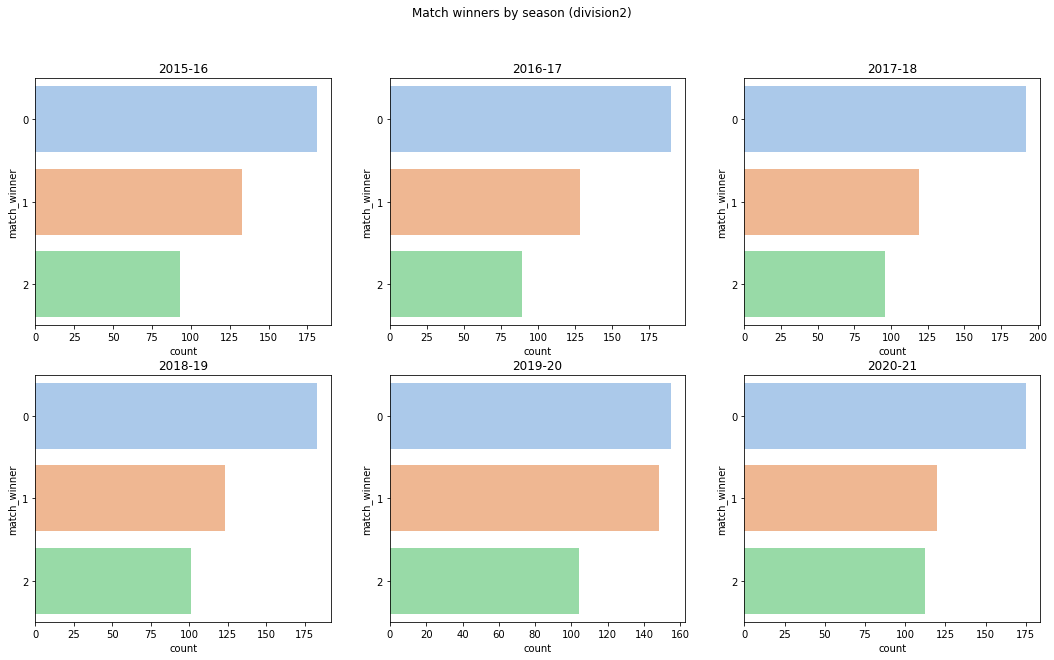

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Match winners by season (division2)')

axes[0,0].set_title('2015-16')
axes[0,1].set_title('2016-17')
axes[0,2].set_title('2017-18')
axes[1,0].set_title('2018-19')
axes[1,1].set_title('2019-20')
axes[1,2].set_title('2020-21')

sns.countplot(ax=axes[0, 0], data=plotting_div2_2016, y='match_winner', palette='pastel')
sns.countplot(ax=axes[0, 1], data=plotting_div2_2017, y='match_winner', palette='pastel')
sns.countplot(ax=axes[0, 2], data=plotting_div2_2018, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 0], data=plotting_div2_2019, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 1], data=plotting_div2_2020, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 2], data=plotting_div2_2021, y='match_winner', palette='pastel')

In view of these results, it can be seen that in the first three seasons there was a high percentage of home wins in both the first and second divisions, while the number of draws and away wins remained close, with draws being in a slight majority. 

However, in the last three seasons in the first division there has been a marked tendency towards less favouritism of the home team, and a higher number of away wins compared to the number of draws. This can be justified by the lack of fans in the stadiums due to the pandemic both last season and in the second half of the 19-20 season. However, already in the 18-19 season, prior to Covid, the beginning of this trend could be seen.

On the other hand, in the second division, the home team is still favoured, with the exception of the 19-20 season. A season that can be observed, very different from the rest reaching almost the number of draws to the number of victories of the home team. We could speak of exceptionality in this season, as despite the second half of the season being affected by the absence of the public, this factor has been maintained in the 20-21 season, which again has similar results to the first three seasons in terms of the number of local victories.

#### Plotting correlated inputs

Finally, some of the variables that were most correlated with each other are plotted, which because of their significance can be considered of interest and influence on the output variable.
For this purpose, the filters established in the last plots are used.

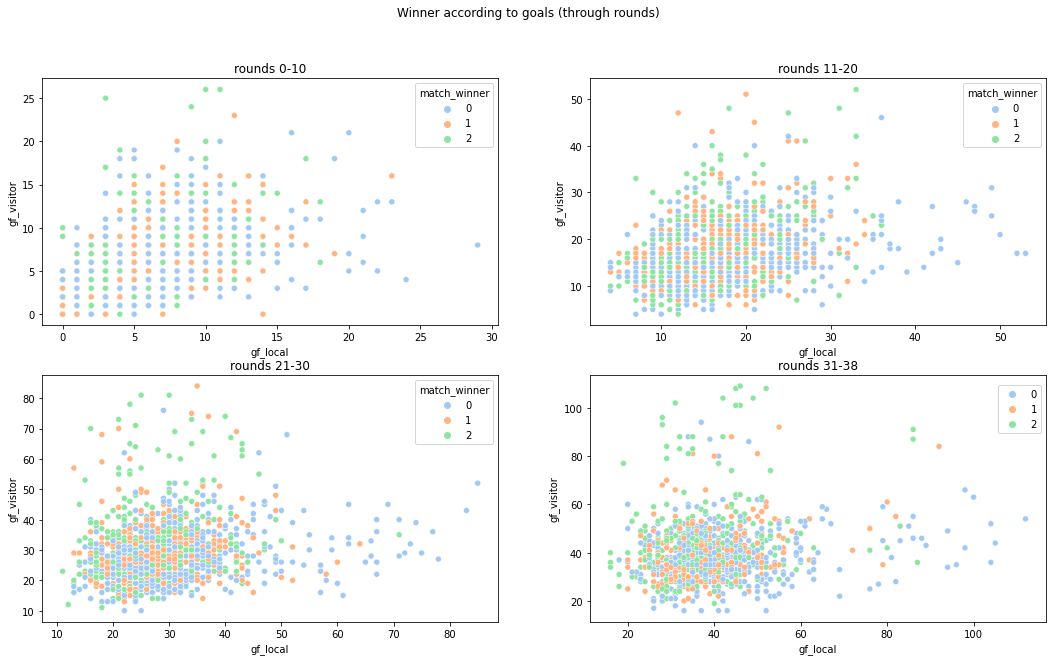

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Winner according to goals (through rounds)')

axes[0,0].set_title('rounds 0-10')
axes[0,1].set_title('rounds 11-20')
axes[1,0].set_title('rounds 21-30')
axes[1,1].set_title('rounds 31-38')


sns.scatterplot(ax=axes[0, 0], data=plotting_data_round10, x="gf_local", y="gf_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 1], data=plotting_data_round10_20, x="gf_local", y="gf_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 0], data=plotting_data_round20_30, x="gf_local", y="gf_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 1], data=plotting_data_round30, x="gf_local", y="gf_visitor", hue="match_winner", palette='pastel')

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=1)

#### Wins 2nd division

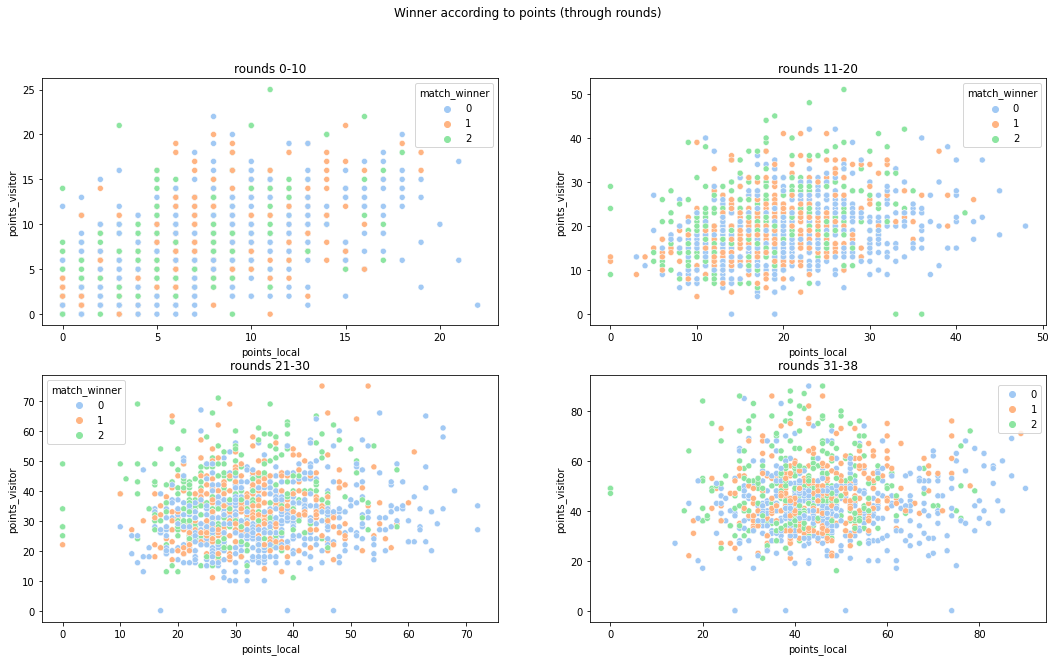

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Winner according to points (through rounds)')

axes[0,0].set_title('rounds 0-10')
axes[0,1].set_title('rounds 11-20')
axes[1,0].set_title('rounds 21-30')
axes[1,1].set_title('rounds 31-38')


sns.scatterplot(ax=axes[0, 0], data=plotting_data_round10, x="points_local", y="points_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 1], data=plotting_data_round10_20, x="points_local", y="points_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 0], data=plotting_data_round20_30, x="points_local", y="points_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 1], data=plotting_data_round30, x="points_local", y="points_visitor", hue="match_winner", palette='pastel')

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=1)

The variables selected for these last plots have been the goals scored (gf) by both teams when they play each other, and the points accumulated so far this season by each team (points_local and points_visitor). Other variables have been tested whose graphs were confusing and therefore have not been kept in the notebook.

About these graphs, the information to be extracted is clearer with the passing of the rounds, as they show less number of scattered points but with a much higher dispersion.

The scattered points have a larger dispersion in the goals scored plot and in both graphs correspond to very unbalanced matches. According to the direction of the dispersion a trend of results can be observed. A large number of home and away goals against a number of low-scoring teams means in a large majority a victory for the high-scoring team. The same is true for the points of each team, the greater the points gap the more rounds have been played and therefore the greater the differences can be (extremely dispersed sets), which also marks a trend in the victories for the team with a large points difference prior to the match.


An attempt has been made to extract information throughout this notebook thanks to the different plots made. We will continue with this work, trying to achieve more complex and interactive graphics in the front-end of this project made in Tableau.

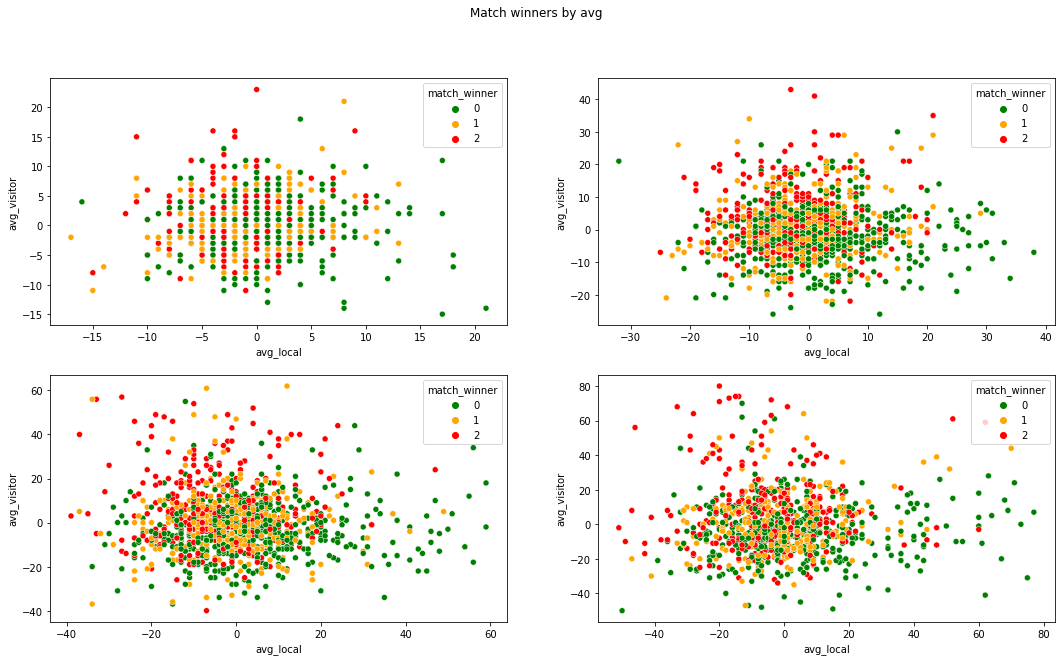

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Match winners by avg')

sns.scatterplot(ax=axes[0, 0], data=plotting_data_round10, x="avg_local", y="avg_visitor", hue="match_winner",palette=['green','orange','red'] )
sns.scatterplot(ax=axes[0, 1], data=plotting_data_round10_20, x="avg_local", y="avg_visitor", hue="match_winner", palette=['green','orange','red'])
sns.scatterplot(ax=axes[1, 0], data=plotting_data_round20_30, x="avg_local", y="avg_visitor", hue="match_winner", palette=['green','orange','red'])
sns.scatterplot(ax=axes[1, 1], data=plotting_data_round30, x="avg_local", y="avg_visitor", hue="match_winner", palette=['green','orange','red'])

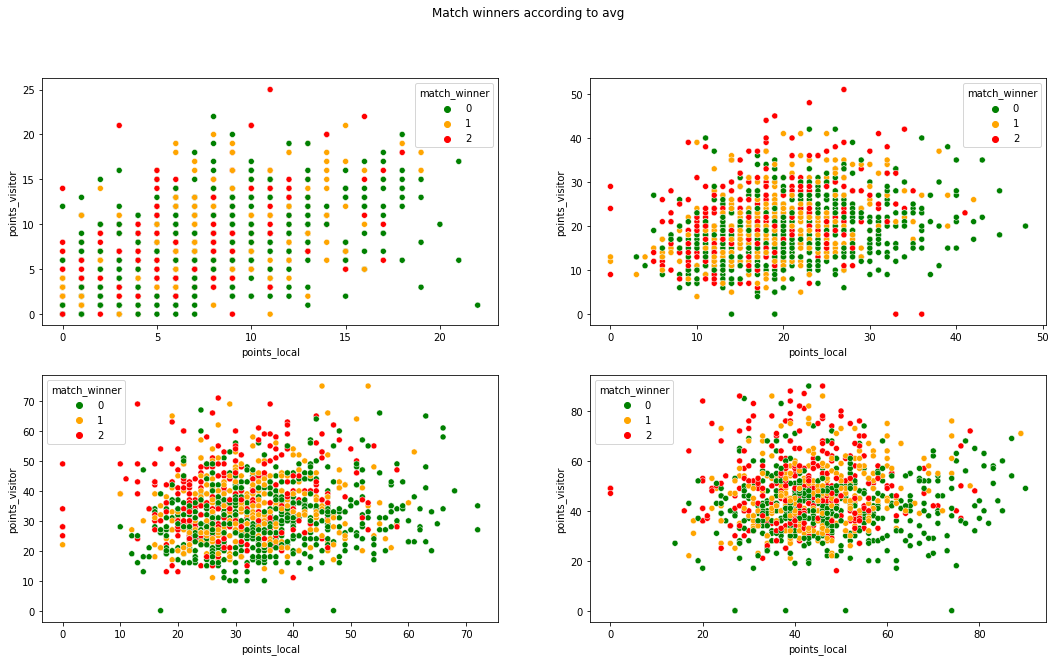

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Match winners according to avg')

sns.scatterplot(ax=axes[0, 0], data=plotting_data_round10, x="points_local", y="points_visitor", hue="match_winner",palette=['green','orange','red'] )
sns.scatterplot(ax=axes[0, 1], data=plotting_data_round10_20, x="points_local", y="points_visitor", hue="match_winner", palette=['green','orange','red'])
sns.scatterplot(ax=axes[1, 0], data=plotting_data_round20_30, x="points_local", y="points_visitor", hue="match_winner", palette=['green','orange','red'])
sns.scatterplot(ax=axes[1, 1], data=plotting_data_round30, x="points_local", y="points_visitor", hue="match_winner", palette=['green','orange','red'])